observed P : 5.26
corrected Pz_theta : 602.751784298176
corrected Pz : 2.085646312450436


/opt/anaconda3/envs/eztao/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.


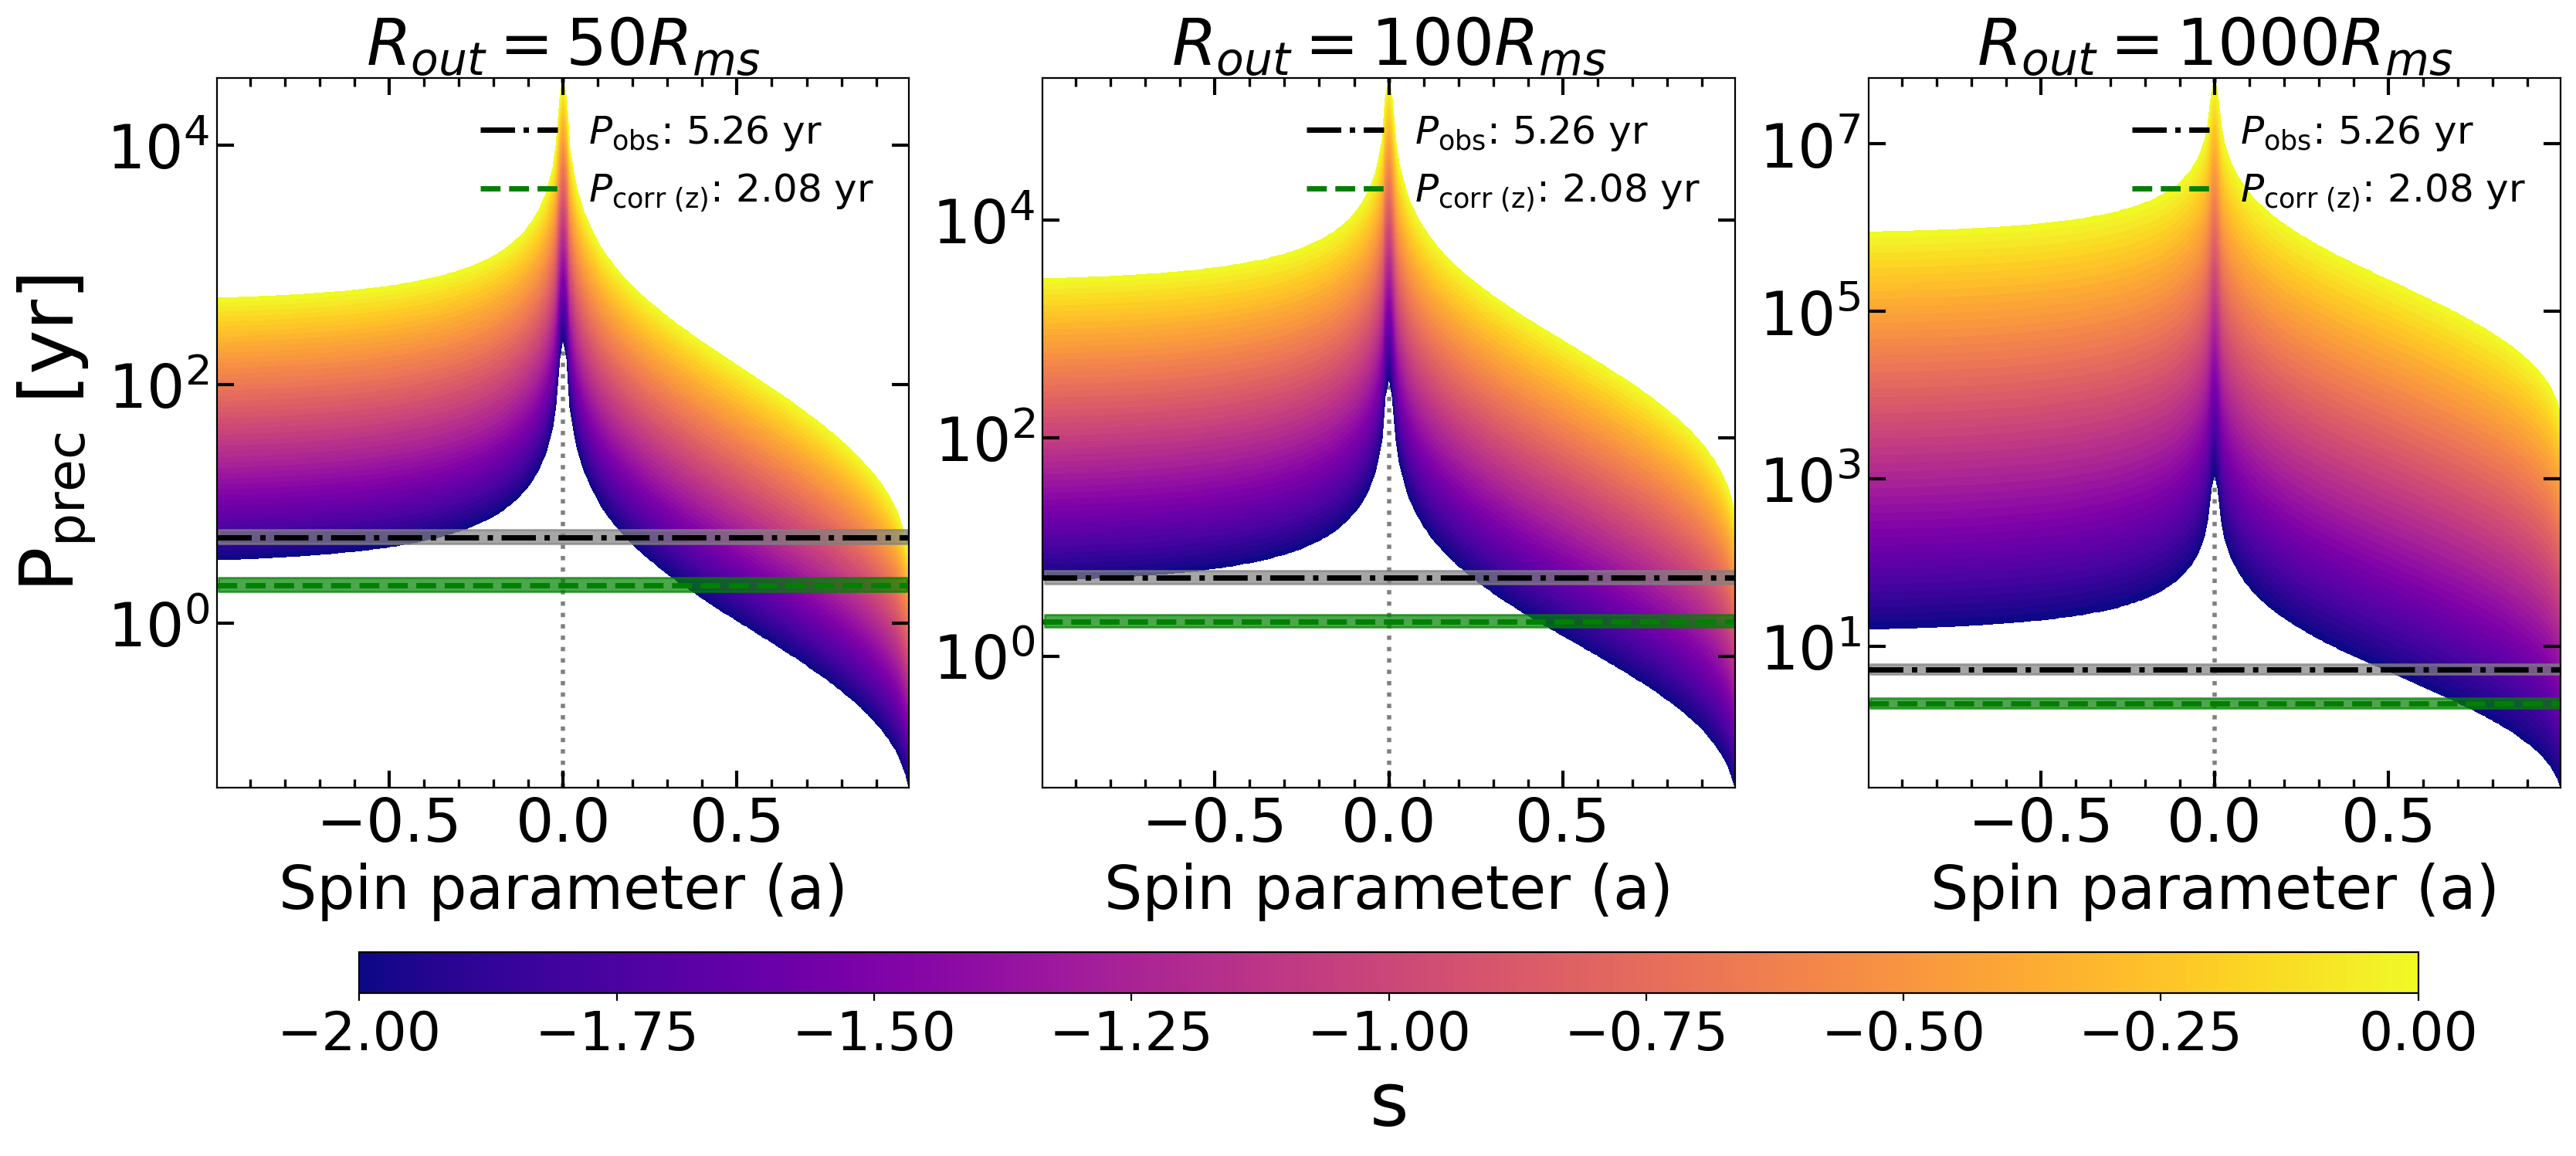

In [1]:
# Lense-Thirring precession of accretion disc with power-law disc surface density profile

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.constants import G, c, pi
from scipy.integrate import quad

# --- Period ---
P_obs = 5.26 # yr
Gamma = 17
z = 1.522
P = P_obs * Gamma**2 / (1+z)
Pz = P_obs / (1+z)
print('observed P :', P_obs)
print('corrected Pz_theta :', P)
print('corrected Pz :', Pz)

# --- Parameters ---
M_bh = 4e8 * 1.98847e30   # BH mass in kg
Rg = G * M_bh / c**2      # gravitational radius in meters

# ISCO radius function (Bardeen+1972)
def r_ms(a):
    Z1 = 1 + (1 - a**2)**(1/3) * ((1 + a)**(1/3) + (1 - a)**(1/3))
    Z2 = np.sqrt(3*a**2 + Z1**2)
    if a >= 0:
        return 3 + Z2 - np.sqrt((3 - Z1) * (3 + Z1 + 2*Z2))  # prograde
    else:
        return 3 + Z2 + np.sqrt((3 - Z1) * (3 + Z1 + 2*Z2))  # retrograde

# Functions Upsilon and Psi
def Upsilon(xi, a): return xi**1.5 + a
def Psi(xi, a): return 1 - np.sqrt(1 - 4*a*xi**(-1.5) + 3*a**2*xi**(-2))

# Precession period from Eq. (11)
def P_prec(a, Rout_factor, s):
    xi_ms = r_ms(a)
    xi_out = Rout_factor * xi_ms
    
    num = quad(lambda xi: xi**(s+3) / Upsilon(xi, a), xi_ms, xi_out)[0]
    den = quad(lambda xi: xi**(s+3) * Psi(xi, a) / Upsilon(xi, a)**2, xi_ms, xi_out)[0]
    
    P = 2*pi*G*M_bh/c**3 * num/den   # in seconds
    return abs(P) / (3600*24*365)    # convert to years

# --- Compute curves ---
a_vals = np.linspace(-0.99, 0.99, 200)
s_grid = np.linspace(-2, 0, 50)  # Continuous s for smooth colorbar
Rout_factors = [50, 100, 1000]

fig, axes = plt.subplots(1, 3, figsize=(17, 7.5),  dpi=200)
axes[0].set_ylabel(r"P$_{\mathrm{prec}} \ $[yr]", fontsize=35)

for j, Rout_factor in enumerate(Rout_factors):
    ax = axes[j]
    
    # Compute P_grid
    P_grid = np.zeros((len(s_grid), len(a_vals)))
    for i, s in enumerate(s_grid):
        P_grid[i] = [P_prec(a, Rout_factor, s) for a in a_vals]
    
    A, S = np.meshgrid(a_vals, s_grid)
    
    ########## Plot with pcolormesh (similar to imshow but handles variable y)
    pcm = ax.pcolormesh(A, P_grid, S, cmap='plasma', shading='auto')
    
    ax.axvline(0, color='grey', ls=':', lw=2, zorder=-10)
    ax.axhline(5.26, color='k', ls='-.', lw=2.5, label=r"$P_{\mathrm{obs}}$: 5.26 yr")
    ax.fill_between([-0.99, 0.99], 4.64, 6.088, color='grey', alpha=0.7)
    ax.axhline(Pz, color='green', ls='--', lw=2.5, label=r"$P_{\mathrm{corr \ (z)}}$: 2.08 yr")
    ax.fill_between([-0.99, 0.99], 1.84, 2.41, color='green', alpha=0.7)


    ax.set_xlabel("Spin parameter (a)", fontsize=28)
    #ax.set_ylabel(r"P$_{\mathrm{prec}}$[yr]", fontsize=19)
    ax.set_title(f"$R_{{out}} = {Rout_factor} R_{{ms}}$", fontsize=30)
    ax.set_yscale('log')
    ax.minorticks_on()
    ax.tick_params(labelsize=28)
    ax.tick_params(axis='both', which='major', direction='in', length=8, width=1.5)
    ax.tick_params(axis='both', which='minor', direction='in', length=4, width=1.2)

    ax.tick_params(top=True, right=True, which='both')
    ax.legend(fontsize=18, frameon=False)

    ########### Colorbar for s
    '''cbar = fig.colorbar(pcm, ax=ax, label='s')
    cbar.set_label('s', fontsize=18)          # set label fontsize
    cbar.ax.tick_params(labelsize=15) '''

plt.tight_layout()

cbar = fig.colorbar(pcm, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.18, fraction=0.045, aspect=50 )
cbar.set_label('s', fontsize=35)
cbar.ax.tick_params(labelsize=25)
#plt.tight_layout()
#plt.savefig('LT_Precession_Disc_prec_Final.jpg', format='jpg', dpi=400)
plt.show()

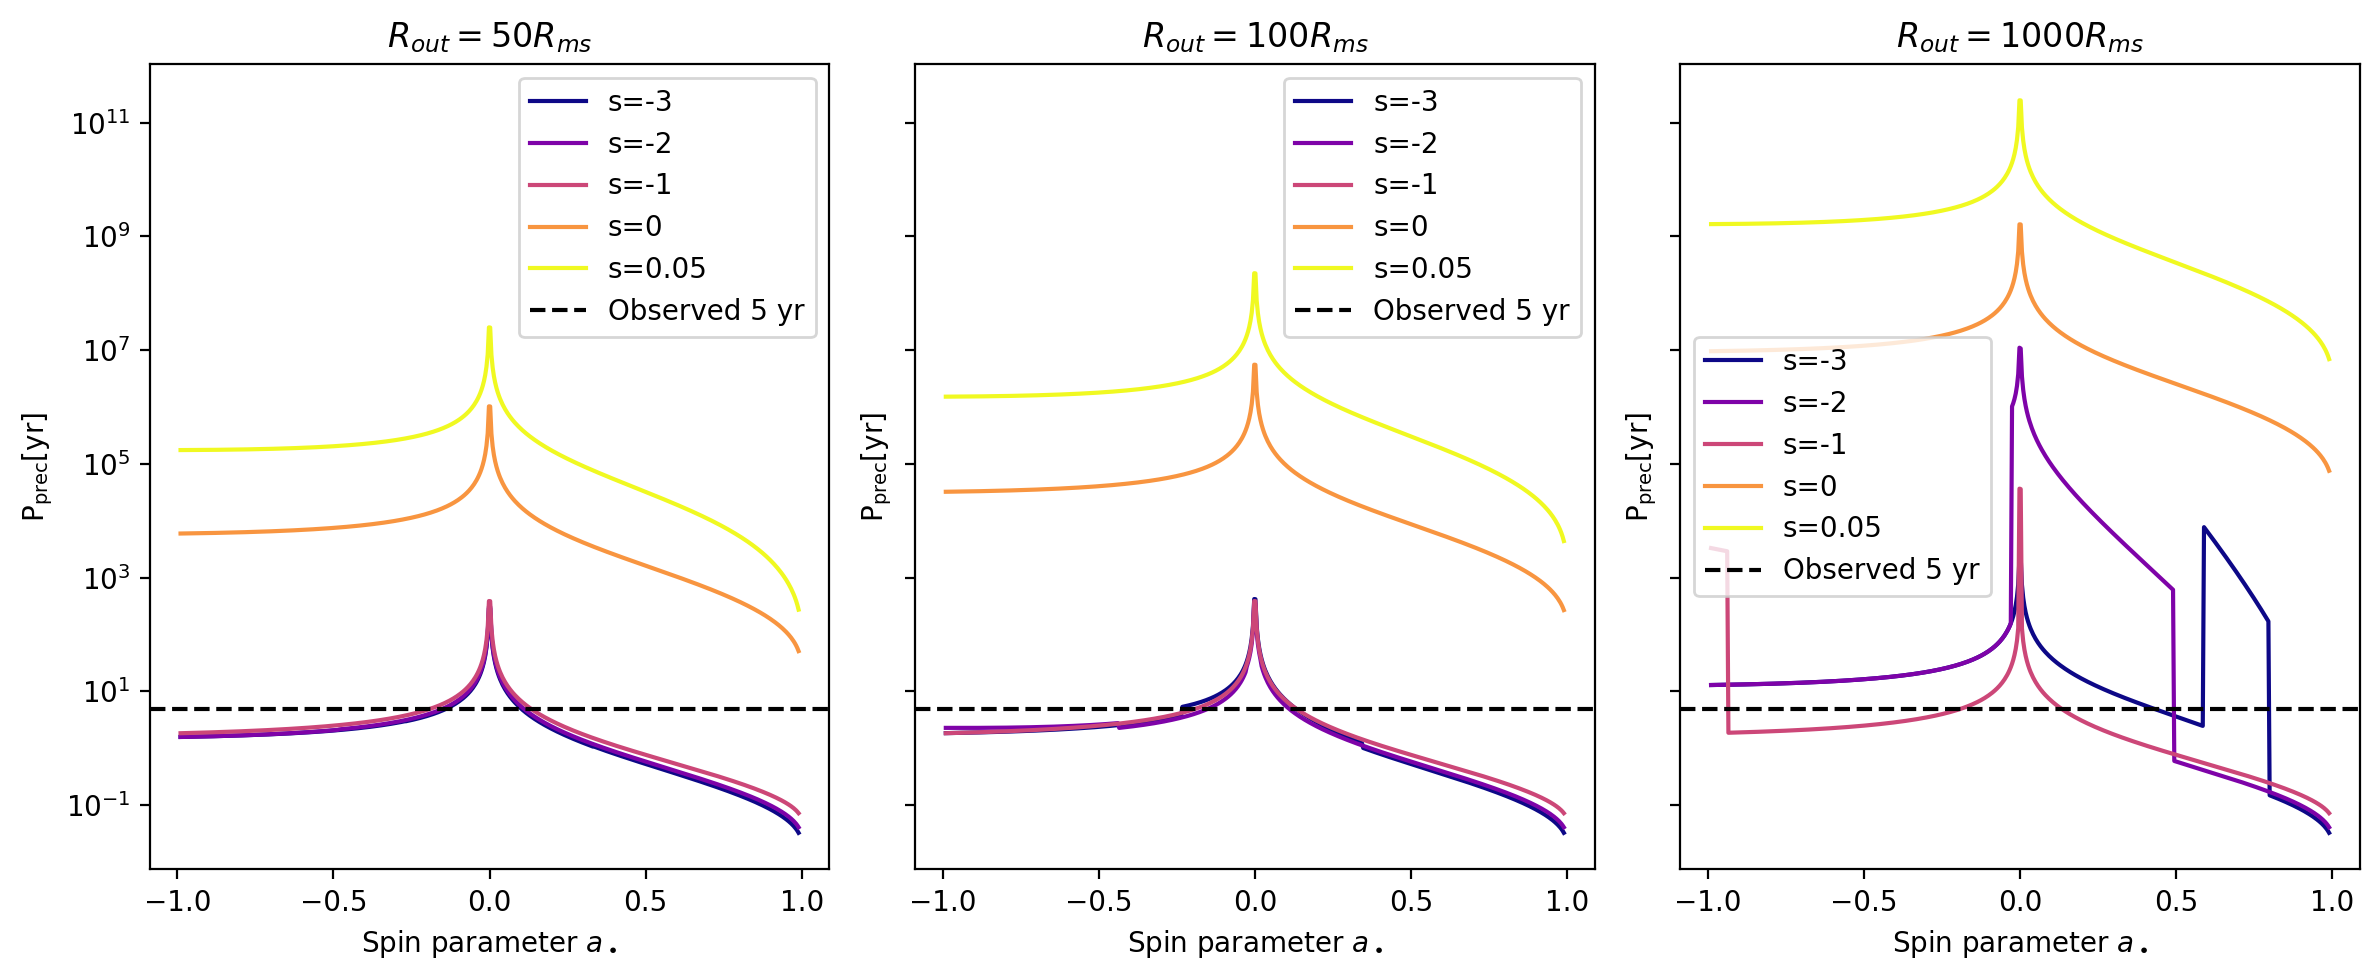

In [2]:
# Lense-Thirring precession of accretion disc with exponential disc surface density profile


import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G, c, pi
from scipy.integrate import quad

# --- Parameters ---
M_bh = 10**9.67 * 1.98847e30   # BH mass in kg
Rg = G * M_bh / c**2      # gravitational radius in meters

s_values = [-3, -2, -1, 0, 0.05]  #####. sigma values for exponential function
# ISCO radius function (Bardeen+1972)
def r_ms(a):
    Z1 = 1 + (1 - a**2)**(1/3) * ((1 + a)**(1/3) + (1 - a)**(1/3))
    Z2 = np.sqrt(3*a**2 + Z1**2)
    if a >= 0:
        return 3 + Z2 - np.sqrt((3 - Z1) * (3 + Z1 + 2*Z2))  # prograde
    else:
        return 3 + Z2 + np.sqrt((3 - Z1) * (3 + Z1 + 2*Z2))  # retrograde
    

# Functions Upsilon and Psi
def Upsilon(xi, a): return xi**1.5 + a
def Psi(xi, a): return 1 - np.sqrt(1 - 4*a*xi**(-1.5) + 3*a**2*xi**(-2))

# Precession period from Eq. (11)
def P_prec(a, Rout_factor, s):
    xi_ms = r_ms(a)
    xi_out = Rout_factor * xi_ms
    
    num = quad(lambda xi: np.exp(s * xi) * xi**(3) / Upsilon(xi, a), xi_ms, xi_out)[0]
    den = quad(lambda xi: np.exp(s * xi) * xi**(3) * Psi(xi, a) / Upsilon(xi, a)**2, xi_ms, xi_out)[0]
    
    P = 2*pi*G*M_bh/c**3 * num/den   # in seconds
    return abs(P) / (3600*24*365)         # convert to years (absolute value for positive period)

# --- Compute curves ---
a_vals = np.linspace(-0.99, 0.99, 500)
Rout_factors = [50, 100, 1000]
colors = plt.cm.plasma(np.linspace(0, 1, len(s_values)))

fig, axes = plt.subplots(1, 3, figsize=(12,5), sharey=True, dpi=200)

for j, Rout_factor in enumerate(Rout_factors):
    ax = axes[j]
    for s, color in zip(s_values, colors):
        P_vals = [P_prec(a, Rout_factor, s) for a in a_vals]
        ax.plot(a_vals, P_vals, color=color, label=f"s={s}")
    
    ax.axhline(5, color='k', ls='--', label="Observed 5 yr")
    ax.set_xlabel("Spin parameter $a_\\bullet$")
    ax.set_ylabel(r"P$_{\mathrm{prec}}$[yr]")
    ax.set_title(f"$R_{{out}} = {Rout_factor} R_{{ms}}$")
    #ax.set_ylim(0, 10000)
    ax.set_yscale('log')
    ax.legend()

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/eztao/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.


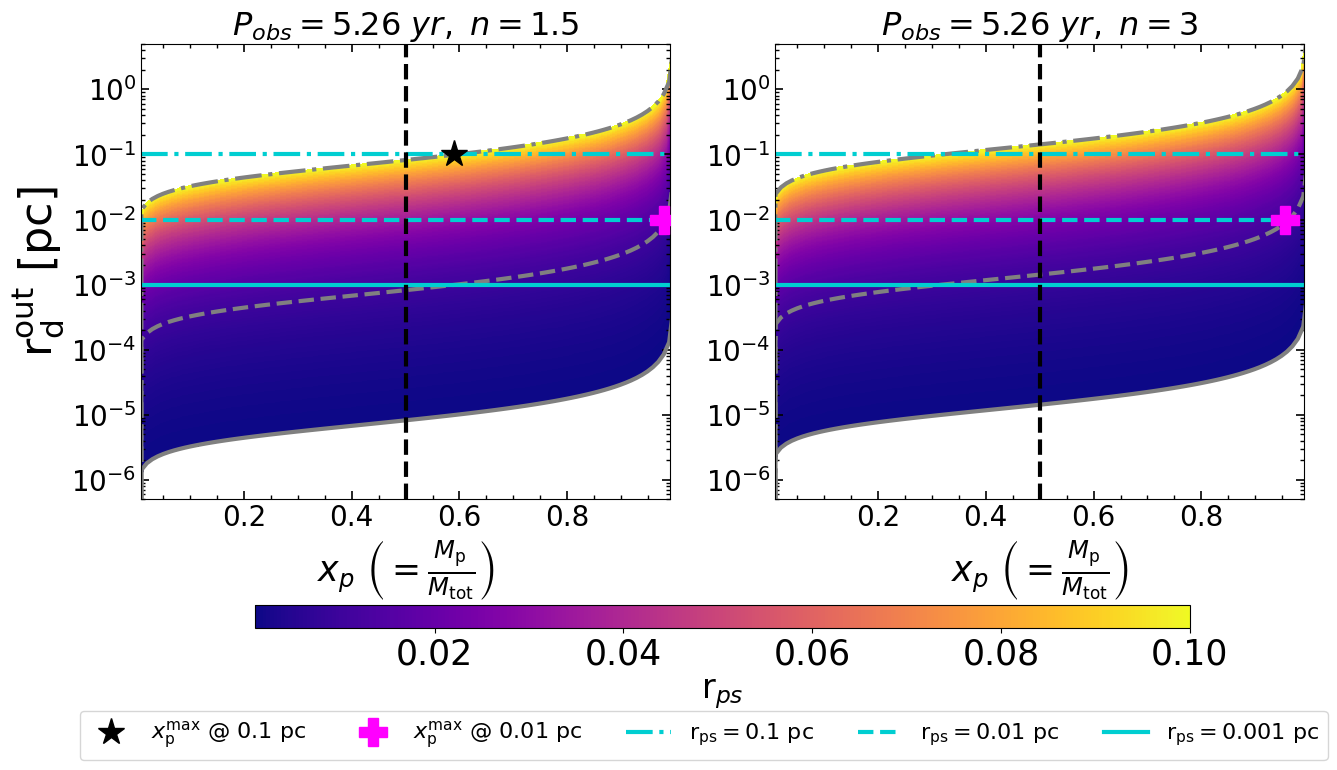

In [4]:
# Binary system

import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos
from matplotlib.lines import Line2D 

# Constants
z = 1.522
P_obs = 5.26                           # observed precession period in years
Gamma = 18
P_jet = (P_obs * Gamma**2) / (1 + z)
Eps = 30.0                             # inclination in degrees
cos_eps = cos(radians(Eps))
M_tot = 8e8                            # total mass in M_sun
G = 4.5e-15                            # G in pc^3 yr^{-2} M_sun^{-1}
r_ps_values = np.logspace(-3,-1,200)
xp = np.linspace(0, 0.999, 100)
r_ps_three_lines = [0.001, 0.01, 0.1]
linestyle = ['-', '--', '-.']
n = [3/2, 3]
xx1 = [0.59]
yy1 = [0.1 ]
xx2 = [0.98,0.955]
yy2 = [0.01,0.01 ]
fig, axes = plt.subplots(1, 2, figsize=(15, 8), dpi=100)
axes[0].set_ylabel(r"r$_{\mathrm{d}}^{\mathrm{out}}$ [pc]", fontsize=32)
axes[0].plot(0.59, 0.1, marker = '*', color='k', markersize=20, label=r'$x_{\mathrm{p}}^{\mathrm{max}}$ (Table 5)', zorder=10)

for j, n_val in enumerate(n):  # Renamed n to n_val to avoid shadowing
    ax = axes[j]
    ax.plot(xx2[j], yy2[j], marker = 'P', color='magenta', markersize=20, label=r'$x_{\mathrm{p}}^{\mathrm{max}}$ (Eq. 17)', zorder=10)
   
    # Compute P_grid
    rout_d = np.zeros((len(r_ps_values), len(xp)))
    for i, r_ps in enumerate(r_ps_values):
        pref = (8 * np.pi / 3) * ((5 - n_val) / (7 - 2 * n_val))
        gm = np.sqrt(G * M_tot)
        rout_d[i] = (pref * (1 + z) / (P_jet * cos_eps) * (r_ps ** 3) / gm )**(2/3) * (xp ** (1 / 3)) / ((1 - xp) ** (2 / 3))
       
   
   
    #for r_ps in r_ps_three_lines:
    for j_line, r_ps in enumerate(r_ps_three_lines):  # Renamed j to j_line to avoid shadowing
        rout_d_three = (pref * (1 + z) / (P_jet * cos_eps) * (r_ps ** 3) / gm )**(2/3) * (xp ** (1 / 3)) / ((1 - xp) ** (2 / 3))
        ax.plot(xp, rout_d_three, color='grey', lw=3, ls = linestyle[j_line]) # , label=f'r_ps = {r_ps} pc')
   
   
    A, S = np.meshgrid(xp, r_ps_values)
   
    # Plot with pcolormesh (similar to imshow but handles variable y)
    pcm = ax.pcolormesh(A, rout_d, S, cmap='plasma', shading='auto')
   
    ax.axhline(y=0.1, color='darkturquoise', lw=3, linestyle='-.', label = r"$\mathrm{r_{ps} = 0.1 \ pc}$")
    ax.axhline(y=0.01, color='darkturquoise', lw=3, linestyle='--', label = r"$\mathrm{r_{ps} = 0.01 \ pc}$")
    ax.axhline(y=0.001, color='darkturquoise', lw=3, linestyle='-', label = r"$\mathrm{r_{ps} = 0.001 \ pc}$")
    ax.axvline(x=0.5, color='k', lw=3, linestyle='--')
    ax.set_xlabel(r"$x_p \ \left(=\frac{M_{\mathrm{p}}}{M_{\mathrm{tot}}} \right)$", fontsize=25)
    ax.set_title(f"$P_{{obs}} = 5.26 \ yr, \ n = {n_val}$", fontsize=23)
    ax.set_yscale('log')
    ax.set_ylim(5e-7, 0.5e1)
    ax.set_xlim(0.01, 0.99)
    ax.minorticks_on()
    ax.tick_params(labelsize=20)
    ax.tick_params(axis='both', which='major', direction='in', length=6, width=1.2)
    ax.tick_params(axis='both', which='minor', direction='in', length=3, width=1.0)
    ax.tick_params(top=True, right=True, which='both')
    

fig.subplots_adjust(bottom=0.15)  # Add extra space at the bottom for legend below colorbar
cbar = fig.colorbar(pcm, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.18, fraction=0.04, aspect=40 )
cbar.set_label(r'r$_{ps}$', fontsize=24)
cbar.ax.tick_params(labelsize=25)

# Add single legend outside (below colorbar)
legend_elements = [
    Line2D([0], [0], marker='*', color='k', markersize=20, linestyle='none', label=r'$x_{\mathrm{p}}^{\mathrm{max}}$ @ 0.1 pc'),
    Line2D([0], [0], marker='P', color='magenta', markersize=20, linestyle='none', label=r'$x_{\mathrm{p}}^{\mathrm{max}}$ @ 0.01 pc'),
    Line2D([0], [0], color='darkturquoise', lw=3, ls='-.', label=r"$\mathrm{r_{ps} = 0.1 \ pc}$"),
    Line2D([0], [0], color='darkturquoise', lw=3, ls='--', label=r"$\mathrm{r_{ps} = 0.01 \ pc}$"),
    Line2D([0], [0], color='darkturquoise', lw=3, ls='-', label=r"$\mathrm{r_{ps} = 0.001 \ pc}$")
]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.06), ncol=5, fontsize=16, frameon=True)
#plt.tight_layout()

#plt.savefig('LT_Precession_Binary_sys_M_8e8_P_z_Gamma-corrected_final.jpg', format='jpg', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
# Based on the mass ratio of BHs in binary, merger timescale 

import numpy as np

xp = 0.93
xs = 1 - xp
print('xp', xp)
print('xs', xs)
M_tot = 8e8
Mp_max = xp * M_tot
print('M_p max', Mp_max)
Ms_min = M_tot - Mp_max
print('Ms min', Ms_min)
a = 0.001 #pc
t_merger =3.65e5 * (a/0.01)**4 * (M/4e8)**(-3) * (xp/0.5)**(-1) * (xs/0.5)**(-1)   # seconds


print(f"t_merger = {t_merger:.3f} yr")


In [ ]:
################ LT precession of BH 

a = 0.1
alpha = 0.1
M = 4e8 # Robinson and Bottcher et al. 2024 
acc_rate200 = 200
acc_rate20 = 20
P200 = 10**(9.25) * a**(5/7) * alpha**(48/35) * (M / 10**8)**(1/7) * (acc_rate200 / 10**(-2))**(-6/5)
print('P for accretion rate 200 :', P200)
P20 = 10**(9.25) * a**(5/7) * alpha**(48/35) * (M / 10**8)**(1/7) * (acc_rate20 / 10**(-2))**(-6/5)
print('P for accretion rate 20 :', P20)

############## to achive such a year like QPO, what should be the accretion rate
P_obs = 5.26
z = 1.522
P_LT = P_obs / (1+z)
a = 0.1
alpha = 0.1
M = 4e8
accretion_rate = ((P_LT / (10**(9.25) * a**(5/7) * alpha**(48/35) * (M / 10**8)**(1/7))) ** (-5/6)) * 1e-2 # solar_mass/yr

print(' accretion rate  :', accretion_rate)


############## to achive such a year like QPO, what should be the accretion rate
P_obs = 5.26
z = 1.522
P_LT = P_obs / (1+z)
print(P_LT)
a = 0.1
alpha = 0.1
M = 4e8
#acc_rate200 = 200
#acc_rate20 = 20
spin_para = (P_LT / (10**(9.25) * alpha**(48/35) * (M / 10**8)**(1/7) * (acc_rate200 / 10**(-2))**(-6/5))) ** 7/5 # solar_mass/yr

print('spin parameter   :', spin_para)


In [ ]:
# The orbital period corrected for cosmological redshift correction

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Constants
C = 7.97
m_log = np.linspace(6, 11, 100)

# Function for log10 P_obs
def log_p_obs(a_pc, m_log, z):
    return (3/2)*np.log10(a_pc) - (1/2)*m_log + np.log10(1 + z) + C

# Separations
a_values = [1, 0.1, 0.01, 0.001]
z_values = [0.05, 1.0, 2.0, 5.0]
styles = [':', '--', '-.', '-'] 
c = ['r', 'g', 'b', 'magenta']

fig, axes = plt.subplots(1, 1, figsize=(8, 7), dpi=200)
for j, a in enumerate(a_values):
    for i, z in enumerate(z_values):
        p_log = log_p_obs(a, m_log, z)
        axes.plot(m_log, p_log, linestyle=styles[i], color = c[j], lw=1.5, label=f'z={z}')
    axes.text(10.3, log_p_obs(a, 10, 3.7), f'{a} pc', color=c[j], fontsize=12, rotation=0) 

axes.plot(10.26, 1.09,marker='*',color='cyan',markersize=12, markeredgecolor='k',markeredgewidth=0.5)
axes.text(10, 1.1, r'OJ 287', color='cyan', fontsize=12, ha='center', va='center')

M1_prim = 4e8
q_min = 0.05
q_max = 1
M_tot_min = (1+q_min)*M1_prim
M_tot_max = (1+q_max)*M1_prim

axes.axvspan(
    np.log10(M_tot_min),
    np.log10(M_tot_max),
    ymin=-2,
    ymax=6,
    facecolor='grey',
    alpha=0.5,
    label='PG 1302-102 detection region'
)

axes.text(8.78, 5.2, r'PKS 1424-41', color='k', fontsize=12, ha='center', va='center', rotation=90)
axes.set_xlabel(r'$\log_{10} \mathrm{M_{total}}$ ($M_\odot$)', fontsize=20)
axes.set_ylabel(r'$\log_{10}$[Orbital period (yr)]', fontsize=20)
axes.minorticks_on()
axes.tick_params(labelsize=15)
axes.tick_params(axis='both', which='major', direction='in', length=6, width=1.2)
axes.tick_params(axis='both', which='minor', direction='in', length=3, width=1.0)
axes.tick_params(top=True, right=True, which='both')

axes.set_xlim(6, 11)
axes.set_ylim(-2, 6)
plt.tight_layout()
plt.show()